In [406]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap


In [407]:
df = pd.read_csv('/home/tanmay/JHU/project/AC2PC/summary/report_first_95.tsv',delimiter='\t')
df = df.sort_values(['Site','Subject_ID'])
df.index=range(0,len(df))
df.head(60)

,Site,Subject_ID,T1,DWI,REST1,fMRI_individualized_pressure_CUFF1,fMRI_standard_pressure_CUFF2,REST2,Comments
0,NS,10042,Y,Y,Y,Y,Y,Y,Duplicated T1
1,NS,10047,Y,Y,Y,Y,Y,Y,Duplicate Rest1
2,NS,10050,Y,Y,Y,Y,Y,Y,Uploaded as 100050 (zip name) but PatientID co...
3,NS,10053,Y,Y,Y,Y,Y,Y,NaN
4,NS,10054,Y,Y,Y,Y,Y,Y,NaN
5,NS,10059,Y,Y,Y,Y,Y,Y,NaN
6,NS,10060,Y,Y,Y,N/Y,Y,Y,Cuff 1 scan aborted. Partial scan uploaded.
7,NS,10061,Y,Y,Y,Y,Y,Y,NaN
8,NS,10070,Y,Y,Y,Y,Y,Y,NaN
9,NS,10071,Y,Y,Y,Y,Y,Y,NaN


In [400]:
df=df.drop(['Comments'],axis=1)

In [401]:
cols_to_use= ['T1','DWI','REST1','fMRI_individualized_pressure_CUFF1',
             'fMRI_standard_pressure_CUFF2','REST2']

In [408]:
def replace_column_value(df,variable,old_val='N',new_val=0):
    df[variable].replace(old_val, new_val,inplace=True)
    return df

df = replace_column_value(df,'T1',old_val='N',new_val=0)
df = replace_column_value(df,'T1',old_val='Y',new_val=1)

df = replace_column_value(df,'DWI',old_val='N',new_val=0)
df = replace_column_value(df,'DWI',old_val='Y',new_val=1)

df = replace_column_value(df,'REST1',old_val='N',new_val=0)
df = replace_column_value(df,'REST1',old_val='Y',new_val=1)

df = replace_column_value(df,'fMRI_individualized_pressure_CUFF1',old_val='N',new_val=0)
df = replace_column_value(df,'fMRI_individualized_pressure_CUFF1',old_val='Y',new_val=1)
df = replace_column_value(df,'fMRI_individualized_pressure_CUFF1',old_val='N/Y',new_val=2)

df = replace_column_value(df,'fMRI_standard_pressure_CUFF2',old_val='N',new_val=0)
df = replace_column_value(df,'fMRI_standard_pressure_CUFF2',old_val='Y',new_val=1)
df = replace_column_value(df,'fMRI_standard_pressure_CUFF2',old_val='N/Y',new_val=2)


df = replace_column_value(df,'REST2',old_val='N',new_val=0)
df = replace_column_value(df,'REST2',old_val='Y',new_val=1)



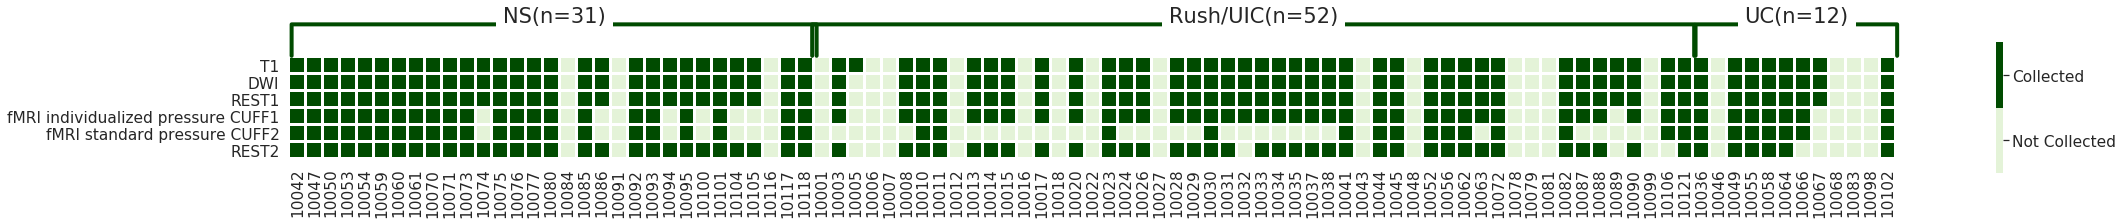

In [430]:

fig, ax = plt.subplots(figsize=(36, 3))

collected = '#004B00'
not_collected = '#E4F3D8'
# truncated = '#9bf09d'
myColors = (not_collected,collected)

cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

sns.heatmap(df[cols_to_use].T, cmap=cmap,square=True,
           linewidth=2, cbar_kws={"shrink": 0.8})

ax.set_yticklabels(['T1','DWI','REST1','fMRI individualized pressure CUFF1',
                   'fMRI standard pressure CUFF2','REST2']) 

ax.set_xticklabels(df['Subject_ID'], rotation=90) 
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.5,1.5])
colorbar.set_ticklabels(['Not Collected', 'Collected'])

n_ns = df[df.Site=='NS'].shape[0]
n_rush = df[df.Site=='Rush/UIC'].shape[0]
n_uc = df[df.Site=='UC'].shape[0]

ax.annotate('NS(n=%s)'%n_ns, xy=(0.165,1.30), xytext=(0.165,1.30), xycoords='axes fraction', 
            fontsize=fs*1.5, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=12.5, lengthB=1.5', lw=4,color=collected))

ax.annotate('Rush/UIC(n=%s)'%n_rush, xy=(0.6,1.30), xytext=(0.6,1.30), xycoords='axes fraction', 
            fontsize=fs*1.5, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=21, lengthB=1.5', lw=4,color=collected))

ax.annotate('UC(n=%s)'%n_uc, xy=(0.938,1.30), xytext=(0.938,1.30), xycoords='axes fraction', 
            fontsize=fs*1.5, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=4.8, lengthB=1.5', lw=4,color=collected))

plt.savefig('first_95_subjects',dpi=600,bbox_inches='tight')
plt.show()
